# This is notebook is used to train model for ml model deployment using flask training. I wanted to quickly have working model so, I didn't pay much intention on the data preprocessing nor on the model trainig.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import os 
from zipfile import ZipFile

In [3]:
try:
    with ZipFile('datasets/titanic/titanic.zip') as z:
        z.extractall('datasets/titanic/')
except:
    print('files already extracted!')

In [5]:
!dir "datasets/titanic/"

 Volume in drive C has no label.
 Volume Serial Number is EEAD-1D20

 Directory of C:\Users\mahmoud\Desktop\cv-notebooks\datasets\titanic

05/20/2023  04:51 PM    <DIR>          .
05/20/2023  04:51 PM    <DIR>          ..
05/20/2023  09:05 PM             3,258 gender_submission.csv
05/20/2023  09:05 PM            28,629 test.csv
05/20/2023  04:48 PM            34,877 titanic.zip
05/20/2023  09:05 PM            61,194 train.csv
               4 File(s)        127,958 bytes
               2 Dir(s)  37,857,800,192 bytes free


___

# Data Exploration.

In [6]:
raw_train = pd.read_csv('datasets/titanic/train.csv', index_col= 'PassengerId')
raw_test  = pd.read_csv('datasets/titanic/test.csv', index_col= 'PassengerId')

In [7]:
df = raw_train
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Name      891 non-null    object 
 3   Sex       891 non-null    object 
 4   Age       714 non-null    float64
 5   SibSp     891 non-null    int64  
 6   Parch     891 non-null    int64  
 7   Ticket    891 non-null    object 
 8   Fare      891 non-null    float64
 9   Cabin     204 non-null    object 
 10  Embarked  889 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


In [8]:
df.sample(n=3)

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
791,0,3,"Keane, Mr. Andrew ""Andy""",male,NaN,0,0,12460,7.7500,NaN,Q
249,1,1,"Beckwith, Mr. Richard Leonard",male,37.0,1,1,11751,52.5542,D35,S
369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,NaN,Q


In [9]:
df.isna().sum()

Survived      0
Pclass        0
Name          0
Sex           0
Age         177
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       687
Embarked      2
dtype: int64

In [10]:
df.rename(columns=str.lower, inplace=True)

C:\Users\mahmoud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


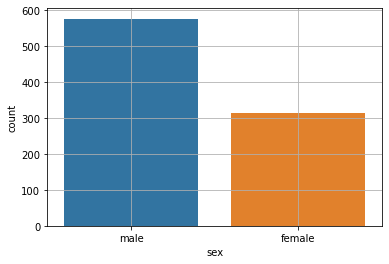

In [11]:
sb.countplot(df['sex']);
plt.grid()

In [12]:
# looking at the aget range
def age_trm(x):
    if x <= 10:
        return "baby"
    elif x <= 20:
        return "<20"
    elif x <= 30:
        return "20th"
    elif x <= 40:
        return "30th"
    elif x <= 50:
        return "40th"
    else:
        return ">50"
    
age_drw = df['age'].dropna().astype('int64').apply(age_trm)

In [13]:
s = df[df['age'].isna() == False]['sex']

C:\Users\mahmoud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


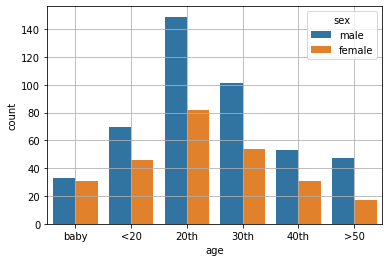

In [14]:
order = ['baby','<20', '20th', '30th', '40th', '>50' ]
sb.countplot(age_drw,hue= s ,order=order);
plt.grid()

C:\Users\mahmoud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


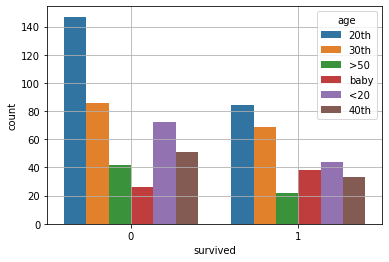

In [15]:
svd_draw = df[df['age'].isna() == False]['survived']
sb.countplot(svd_draw, hue = age_drw);
plt.grid()

C:\Users\mahmoud\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


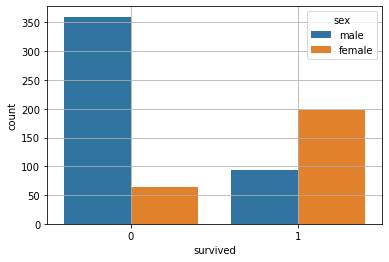

In [16]:
svd_draw = df[df['age'].isna() == False]['survived']
hue = df[df['age'].isna() == False]['sex']
sb.countplot(svd_draw, hue = hue);
plt.grid()

___

# Data Preprocessing.

In [17]:
raw_train.head()

,survived,pclass,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [18]:
df.drop(columns=['name','embarked', 'ticket', 'fare', 'cabin'], inplace= True)

In [19]:
df.isna().sum()

survived      0
pclass        0
sex           0
age         177
sibsp         0
parch         0
dtype: int64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  891 non-null    int64  
 1   pclass    891 non-null    int64  
 2   sex       891 non-null    object 
 3   age       714 non-null    float64
 4   sibsp     891 non-null    int64  
 5   parch     891 non-null    int64  
dtypes: float64(1), int64(4), object(1)
memory usage: 81.0+ KB


In [21]:
df.dropna(inplace= True)

In [22]:
df['age']= df['age'].astype('int64')

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 714 entries, 1 to 891
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   survived  714 non-null    int64 
 1   pclass    714 non-null    int64 
 2   sex       714 non-null    object
 3   age       714 non-null    int64 
 4   sibsp     714 non-null    int64 
 5   parch     714 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 39.0+ KB


In [24]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split

In [25]:
encoder = OneHotEncoder(dtype= np.int64)

In [26]:
tfmd = encoder.fit_transform(df[['sex']]).toarray()

In [27]:
tfmd = pd.DataFrame(tfmd,columns=encoder.get_feature_names(), index = df.index)

In [28]:
tfmd.head()

,x0_female,x0_male
PassengerId,,
1,0,1
2,1,0
3,1,0
4,1,0
5,0,1


In [29]:
df = pd.concat([df,tfmd], axis=1)

In [30]:
df.head()

,survived,pclass,sex,age,sibsp,parch,x0_female,x0_male
PassengerId,,,,,,,,
1,0,3,male,22,1,0,0,1
2,1,1,female,38,1,0,1,0
3,1,3,female,26,0,0,1,0
4,1,1,female,35,1,0,1,0
5,0,3,male,35,0,0,0,1


In [31]:
df.isna().sum()

survived     0
pclass       0
sex          0
age          0
sibsp        0
parch        0
x0_female    0
x0_male      0
dtype: int64

In [32]:
y = df['survived'].copy()
df.drop(columns=['survived', 'sex'], inplace = True)

In [33]:
x_train,x_test, y_train,y_test = train_test_split(df, y, train_size= .7, test_size=.3)

In [34]:
from sklearn.svm import SVC
from sklearn.metrics import auc , roc_curve

In [35]:
model1 = SVC(probability=True)
model1.fit(x_train, y_train)

SVC(probability=True)

In [36]:
model1.score(x_train, y_train)

0.6232464929859719

In [37]:
y_pred = model1.predict(x_test)

In [38]:
roc_curve(y_test, y_pred)

(array([0.       , 0.0234375, 1.       ]),
 array([0.        , 0.09195402, 1.        ]),
 array([2, 1, 0], dtype=int64))

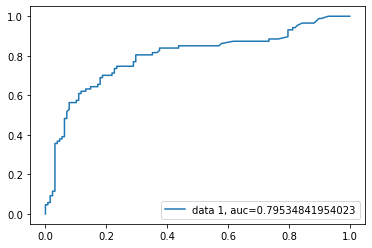

In [39]:
from sklearn.metrics import roc_auc_score
y_pred_proba = model1.predict_proba(x_test)[::,1]
fpr, tpr, _ = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

In [40]:
import pickle

In [45]:
with open("svc_model.pkl", 'wb') as f:    
    svc_model = pickle.dump(model1,f )